# CAPSTONE PROJECT: COMBATING COVID-19 MISINFORMATION

Samuel Garcia | April 11, 2021

Combating Covid-19 Misinformation is...

**Please Note:** This is notebook 4 of 6...

-------------------------------------------------------------------------------------------------------------------

# Loading & Merging Datasets

In [2]:
# Importing everything we need
# The usual packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To make our sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import itertools

# Scoring
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Word Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
import re
from nltk.corpus import stopwords

# Cell Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


## Loading in the DataFrames

### Tweets Data Sets - "Real" & "Fake"

In [3]:
train = pd.read_csv('data/Constraint_English_Train - Sheet1.csv')
val = pd.read_csv('data/Constraint_English_Val - Sheet1.csv')
test = pd.read_csv('data/Constraint_test_with_labels - Sheet1.csv')

In [4]:
train

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [5]:
val

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake
2136,2137,Current understanding is #COVID19 spreads most...,real
2137,2138,Nothing screams “I am sat around doing fuck al...,fake
2138,2139,Birx says COVID-19 outbreak not under control ...,fake


In [6]:
test

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


## Merge Data Frames

In [7]:
CoAID_tweets_df = train.append(val).fillna(0)

In [8]:
CoAID_tweets_df = CoAID_tweets_df.append(test).fillna(0)

In [9]:
CoAID_tweets_df

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [10]:
CoAID_tweets_df.head(100).values

array([[1,
        'The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.',
        'real'],
       [2,
        'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux',
        'real'],
       [3,
        'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville',
        'fake'],
       [4,
        '#IndiaFightsCorona: We have 1524 #COVID testing laboratories in India and as on 25th August 2020 36827520 tests have been done : @ProfBhargava DG @ICMRDELHI #StaySafe #IndiaWillWin https://t.co/Yh3ZxknnhZ',
        'real'],
       [5,
        'Populous states can generate large case counts but if you look at the new cases per million today 9 smaller states are showing more cases per million than California 

## Export Final Data Set

In [11]:
#CoAID_tweets_df.to_csv (('CoAID_tweets_df.csv'), index = False, header=True)

## Final Data Set Distributions

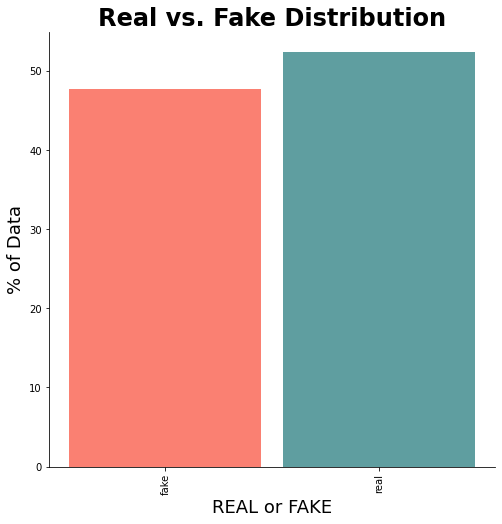

In [12]:
# Notebook: Text Data
data = CoAID_tweets_df

values, counts = np.unique(data['label'], return_counts=True)
normalized_counts = counts / counts.sum()

plt.figure(figsize=(8, 8))
plt.bar(values,normalized_counts * 100, width=.9, color=['salmon', 'cadetblue'])
plt.xlabel('REAL or FAKE', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('% of Data', fontsize=18)
sns.despine()
plt.title("Real vs. Fake Distribution", fontweight=800, fontsize=24)
plt.show()

In [13]:
normalized_counts

array([0.47663551, 0.52336449])